**Dataset Info**

- Paper: TON_IoT telemetry dataset: a new generation dataset of IoT and IIoT for data-driven Intrusion Detection Systems
- Published in: IEEE Access
- Date: 09 September 2020
- Links: 
    - https://research.unsw.edu.au/projects/toniot-datasets
    - https://unsw-my.sharepoint.com/personal/z5025758_ad_unsw_edu_au/_layouts/15/onedrive.aspx

In [1]:
import os
import pandas as pd

df = pd.read_csv(os.getcwd() + '/../data/ton-iot/TON_IoT datasets/Train_Test_datasets/Train_Test_Network_dataset/train_test_network.csv', low_memory=False)

In [2]:
print("No of Featueres: ", len(df.columns))
print("Features: ", df.columns)

No of Featueres:  44
Features:  Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')


In [5]:
# For each column print number of unique values in a table
import tabulate

table = []
for col in df.columns:
    table.append([col, len(df[col].unique())])

print(tabulate.tabulate(table, headers=['Feature', 'Unique Values']))


Feature                   Unique Values
----------------------  ---------------
src_ip                               51
src_port                          26628
dst_ip                              753
dst_port                           2039
proto                                 3
service                               9
duration                          68570
src_bytes                          2199
dst_bytes                          2338
conn_state                           13
missed_bytes                        694
src_pkts                            274
src_ip_bytes                       3648
dst_pkts                            203
dst_ip_bytes                       3304
dns_query                           726
dns_qclass                            3
dns_qtype                            12
dns_rcode                             4
dns_AA                                3
dns_RD                                3
dns_RA                                3
dns_rejected                          3


In [4]:
print("No of classes: ", len(df['type'].unique()))
print(df['type'].unique())

No of classes:  10
['backdoor' 'ddos' 'dos' 'injection' 'mitm' 'normal' 'password'
 'ransomware' 'scanning' 'xss']


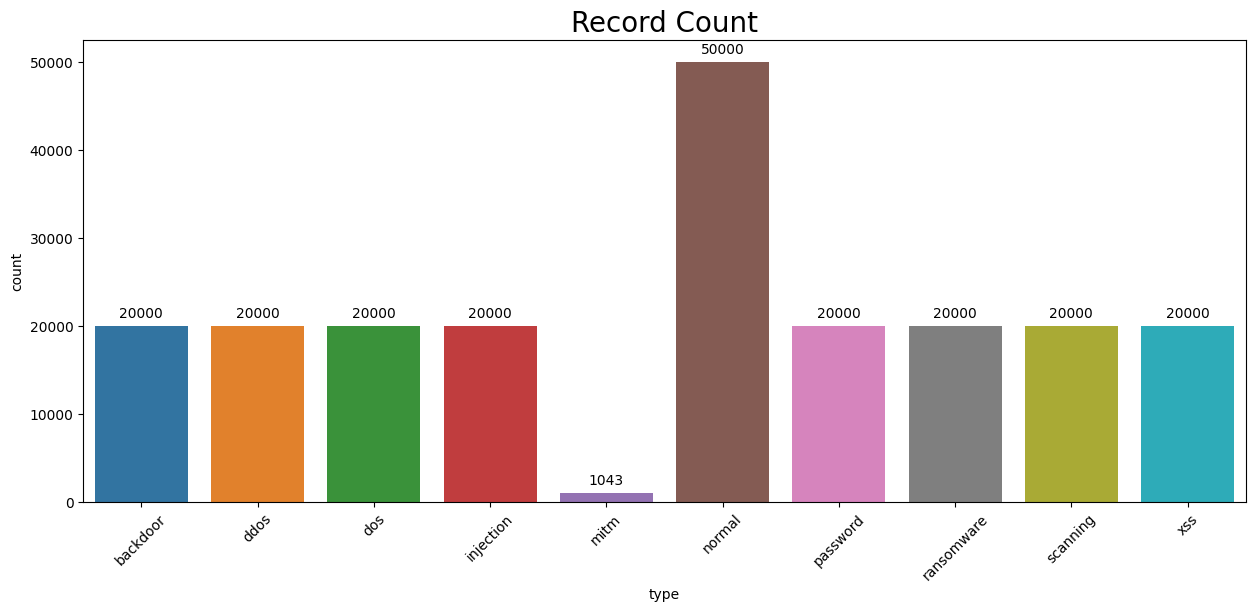

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
s = sns.countplot(data=df, x='type', hue='type')
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.title('Record Count', fontsize=20)

plt.show()

In [7]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Print length of dataset after removing duplicates
print("Length of dataset before removing duplicates: ", len(df))
print("Length of dataset after removing duplicates: ", len(df_no_duplicates))

Length of dataset before removing duplicates:  211043
Length of dataset after removing duplicates:  190474
